In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [26]:
concrete = pd.read_csv('https://raw.githubusercontent.com/mardgeer101/Machine-Learning-with-R-datasets/master/concrete.csv')
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [62]:
ct = make_column_transformer(
    (MinMaxScaler(),concrete.keys().drop('strength'))
)

ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object'))])

In [54]:
X = concrete.drop('strength',axis=1)
y = concrete['strength']
X.shape, y.shape

((1030, 8), (1030,))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((875, 8), (155, 8), (875,), (155,))

In [63]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object'))])

In [141]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_train_normal.shape, y_train.shape

((875, 8), (875,))

In [187]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10)

"""
initial_learning_rate = 0.1
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

def step_decay(epoch):
  initial_learning_rate = 0.01
  drop_rate = 1.1
  epochs_drop = 100
  learning_rate = initial_learning_rate * (drop_rate ** np.floor((1+epoch)/epochs_drop))
  return learning_rate

learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(step_decay)
"""

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,kernel_initializer='normal',
                          kernel_regularizer=tf.keras.regularizers.l1(0.01)
                          ),
    tf.keras.layers.Dense(1,kernel_initializer='normal',
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)
                          )
])

model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mse"]
              )

history = model.fit(X_train_normal, y_train, epochs=500, callbacks=[callback],verbose=1)

Epoch 1/500
28/28 [==============================] - 1s 3ms/step - loss: 1177.3979 - mse: 1176.6533
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 292.0851 - mse: 290.0123
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 217.8773 - mse: 215.7477
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 190.0720 - mse: 187.8367
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 167.6273 - mse: 165.3262
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 152.6476 - mse: 150.3166
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 136.8602 - mse: 134.4266
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 130.6973 - mse: 128.1785
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 125.9598 - mse: 123.3403
Epoch 10/500
28/28 [==============================] - 0s 4ms/step - loss: 123.0717 - mse: 120.3744
Epoch 11/500
28/2

In [188]:
model.evaluate(X_test_normal, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 98.2709 - mse: 95.3255


[98.27085876464844, 95.32546997070312]

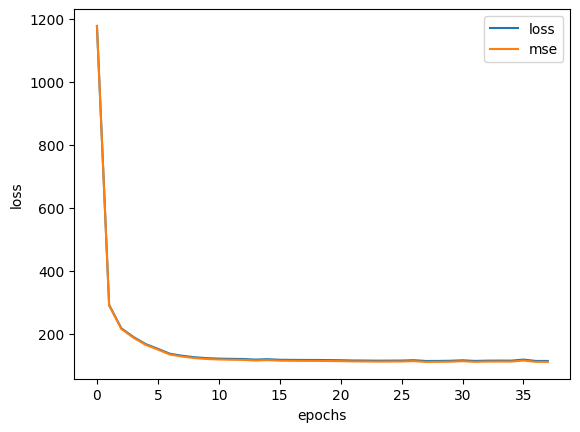

In [189]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [190]:
y_pred = tf.squeeze(model.predict(X_test_normal))
y_pred

5/5 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(155,), dtype=float32, numpy=
array([58.152878, 50.266872, 62.02315 , 49.81986 , 16.008888, 38.780045,
       25.616066, 42.946125, 27.852001, 37.431835, 27.620657, 20.27311 ,
       65.33895 , 50.44648 , 28.675316, 42.440533, 28.4326  , 26.030682,
       31.371105, 30.692938, 35.60482 , 29.673035, 36.24336 , 24.343985,
       32.677532, 32.362568, 13.908233, 40.110317, 40.74511 , 21.328472,
       35.611176, 30.503103, 42.515526, 44.49252 , 29.462124, 29.68851 ,
       27.367535, 38.125874, 19.09566 , 37.36313 , 20.801687, 14.548728,
       29.440763, 48.42987 , 19.342598, 55.450054, 50.026608, 59.28032 ,
       19.383461, 18.452621, 39.089798, 35.192337, 29.090282, 31.92943 ,
       45.400497, 49.527107, 26.287449, 15.790839, 28.81556 , 18.0713  ,
       37.910934, 20.961363, 30.18271 , 54.038834, 22.297752, 21.792812,
       30.898764, 16.644117, 23.601486, 24.596945, 17.116375, 17.794197,
       12.613582, 27.570274, 27.913937, 18.334625, 58.708275, 43.267204,
   

In [185]:
y_test = tf.cast(y_test, tf.float32)
y_test

<tf.Tensor: shape=(155,), dtype=float32, numpy=
array([52.91, 55.9 , 74.5 , 35.3 , 10.54, 44.28, 23.69, 45.37, 37.4 ,
       48.85, 25.1 , 10.73, 40.2 , 49.8 , 33.01, 21.92, 40.06, 19.35,
       37.17, 33.09, 31.38, 37.96, 48.72,  6.9 , 38.6 , 30.85, 11.17,
       41.05, 52.96, 13.22, 52.3 , 39.6 , 51.86, 66.42, 14.94, 33.02,
       31.64, 39.42, 13.66, 51.96, 15.58,  6.28, 38.07, 50.24, 10.03,
       63.4 , 55.55, 36.15, 21.75,  4.83, 57.21, 47.78, 29.41, 12.37,
       64.02, 34.4 , 25.37, 13.71, 31.72, 19.77, 39.42, 13.52, 35.34,
       46.8 , 33.  , 18.03, 33.4 , 12.18, 27.66, 24.43, 11.65, 24.05,
        9.31, 25.1 , 26.14, 11.58, 55.26, 60.95, 61.86, 14.59, 44.21,
       34.9 , 41.68, 39.59, 41.05, 35.3 , 44.61, 33.72, 21.5 , 20.08,
       31.65, 75.5 , 15.04, 56.61, 53.52, 50.66, 31.35, 45.71, 19.11,
       32.92, 25.45, 41.94, 36.25, 24.  , 70.7 , 10.34, 56.81, 30.12,
       44.64, 44.52, 44.7 , 51.04, 30.28, 37.34, 38.61, 61.07, 18.13,
       33.76, 61.99, 53.52, 19.77, 26.94, 

In [191]:
y_test - y_pred

<tf.Tensor: shape=(155,), dtype=float32, numpy=
array([-5.2428780e+00,  5.6331291e+00,  1.2476849e+01, -1.4519859e+01,
       -5.4688883e+00,  5.4999542e+00, -1.9260654e+00,  2.4238739e+00,
        9.5480003e+00,  1.1418163e+01, -2.5206566e+00, -9.5431099e+00,
       -2.5138950e+01, -6.4648056e-01,  4.3346825e+00, -2.0520533e+01,
        1.1627401e+01, -6.6806812e+00,  5.7988930e+00,  2.3970623e+00,
       -4.2248211e+00,  8.2869644e+00,  1.2476643e+01, -1.7443985e+01,
        5.9224663e+00, -1.5125675e+00, -2.7382326e+00,  9.3968201e-01,
        1.2214890e+01, -8.1084719e+00,  1.6688824e+01,  9.0968952e+00,
        9.3444748e+00,  2.1927479e+01, -1.4522124e+01,  3.3314896e+00,
        4.2724648e+00,  1.2941246e+00, -5.4356594e+00,  1.4596870e+01,
       -5.2216873e+00, -8.2687283e+00,  8.6292362e+00,  1.8101311e+00,
       -9.3125982e+00,  7.9499474e+00,  5.5233917e+00, -2.3130318e+01,
        2.3665390e+00, -1.3622622e+01,  1.8120201e+01,  1.2587662e+01,
        3.1971741e-01, -1.955